# A7: Final Project Report
- David Wei

- DATA 512 Fall2019

- 2019-12-10

- [Link](https://wiki.communitydata.science/Human_Centered_Data_Science_(Fall_2019)/Assignments#A7:_Final_project_report) to course wiki and project introduction.

## Table of Contents

- [Introduction](#Introduction)
- [Reproduce the Notebook](#Reproduce-the-Notebook)
- [Background/Related Work](#Background/Related-Work)
- [Research Questions/Hypotheses](#Research-questions/hypotheses)
- [Data Set](#Data-Set)
- [Methodology](#Methodology)
- [Findings](#Findings)
- [Limitations and Implications](#Limitations-and-Implications)
- [Conclusion and Reflection](#Conclusion-and-Reflection)
- [Steps](#Steps)
  - [Data Cleanup](#Data-Cleanup)
  - [Data Validation](#Data-Validation)
  - [Data Analysis](#Data-Analysis)
  - [Deep Dive into One Product](#Deep-Dive-into-One-Product)
  - [WordCloud Visualization](#WordCloud-Visualization)
  - [Stretch Goal](#Stretch-Goal)
- [Reference](#Reference)

## Introduction

I got the initiative of this project while preparing my holiday shopping list. I was browsing large retailer websites (Amazon, BestBuy, etc) for holiday deals and wondering how customers make their purchase decision based on product reviews. As a customer myself, I would like to find a good product with enough verified, detailed customers reviews. In other words, I would like to be able to extract the valuable information from a wide range of sentiment customer reviews with minimum effort.

Given I'm an IT professional and personally enjoying to try out the latest electronics, my investigation will be focusing on consumer electronics, mainly Amazon products. My deliverables of the project will be a statistical descriptive analysis of Amazon products, including but no limiting to top reviewed products, most liked products, and etc. In addition, as a stretch goal, it would be useful to provide suggestions for shoppers like me who are making their holiday shopping lists, such as what to buy and when to buy.

My goal after this project is to explore consumer electronics market in order to understand the importance of human reviews to Amazon products. I would like to understand what do people think of these voice assistants and why or why not do they think they are useful. For my research skills, I am looking for a mix of quantitative and qualitative research approaches. Finally, I would like to make my research report reproducible so that I can derive insights using similar datasets.

## Reproduce the Notebook
The entire Jupyter notebook is executable by having the `data.csv` file at the same root directory. Simple launch Jupyter and it will be ready to build at each step.

## Background/Related Work

We have been very familiar with Amazon's devices, from Kindle, Fire TV to Alexa. I recently read an [article](https://www.cnet.com/news/amazon-has-sold-more-than-100-million-alexa-devices/)[1] from CNET showing that Amazon has sold more than 100 millions of Amazon devices. However, I rarely see negative reviews on these devices, especially voice assistants. I'm trying to find out what do people think of these products and whether do they think they are useful in their lives.

## Research questions/hypotheses
- Are there any spam reviews?
- What are the most reviewed Amazon products?
- What are the highly rated Amazon products?
- For the most reviewed product, what are the reviews and ratings?
- Why do customers like/dislike this product?
- When do customers give more reviews? Why?

Stretch goals:
- Identify the keywords in reviews against the review ratings to help train sentiment models.

## Data Set

This is an indirect approach of analyzing Amazon product since I don't have access to Amazon's sales data.
The dataset contains exactly 5000 customer reviews for more than 50 unique Amazon devices such as Kindle and FireTV. The dataset includes a list of reviews for products, such as `id`, `numHelpful`, `review data`, `rating`, `title`, and etc. The dataset contains 24 columns but not all columns are useful. To make it easier for the reader, I only listed columns I intend to use:

**Schema (non-comprehensive)**

| Column | Description |
|---------|-----------|
|asins|ASINs (Amazon identifiers) for the product|
|brand|brand name of the product|
|colors|color of the product|
|manufacturer|manufacturer of the product|
|reviews.doRecommend|A true/false for whether or not the reviewer recommends the product|
|reviews.numHelpful|the number of people that found this review helpful|
|reviews.rating|a 1 to 5 start value for the review|
|reviews.title|the review's title|


The dataset can be found [here](https://data.world/datafiniti/consumer-reviews-of-amazon-products) at *data.world*.
It has the `CC BY-NC-SA` LICENSE which makes it eligible to be shared with everyone.

Statistics of the dataset:

- size: 99MB
- row: 5000
- columns: 24
- time range: 2015-01 to 2018-09
- content: sampled customer reviews of Amazon product from multiple online retailers

I don't see any ethical concerns for using this dataset as it's properly licensed. All of the entries in the dataset are available online to public. At first I'm concerned the customer reviews might contain personal identifiable information, but it appears the reviews are all anonymous and no reviewer's real names (except reviewer's account names) are recorded in the dataset.

## Methodology

I will follow the general data-driven research steps:
- Data Acquisition
- Data Preparation
- Data Validation
- Data Analysis
- Data Visualization

I will use Python's Pandas DataFrame to perform all data preparation and validation. I will mainly focus on filtering out NULL values.

Then I will perform different kinds of **aggregations** and try to create visualizations to answer some of my research questions.

The challenging part will be the review context analysis. I will pick a specific product to limit my dataset. I will apply the Net Promoter Score metric to this product and try to interpret whether this metric is representing the real customer satisfication. To incorporate human-centered design considerations, I will dig into some sample reviews and do in-person testings of the product to understand why customers like or dislike the product. In addition, I will generate word cloud graphs to visualize high frequency words in reviews with different ratings.

I will conclude my analysis at the end and provide suggestions for online shoppers like me for this upcoming holiday season.


## Limitations and Implications

Given the data set only covers sampled data from January 2015 to August 2018, my research is not able to apply to the latest Amazon products. Thus I won't be able to predict any recommendation or ratings for this coming holiday season. However, given the reproducibility of my research, I will be able to apply all the existing analysis on any dataset in the future. Another issue of the data set is that my customer reviews are sampled. There might be high-valued customer reviews being left out, however, it is not a blocking issue given the scope of my research.

Data integrity and format is my initial concern before the start of the project. Given all reviews are raw text from product page, there might be many unstructured sentences that would make my processing difficult. However, it turns out there are good ways to standardize the text by using regular expression.

After proper data processing, the analysis part is another challenge. Given my limited experience of text processing, I have to do some research first to synthesize the reviews. 

Last but not least, there could be fake reviews or fraud ratings which I cannot 
differentiate. These factors could lead to skewed analysis eventually.

## Steps

Following are the executable part of my project, in Python. Each step has a detailed view of the rationale behind the action and why it is important from the human-centered data science perspective.

### Data Cleanup
#### High-level steps
- remove unrelated columns (time the record was created in database)
- remove high-cardinality columns (image URLs)
- remove columns with large amount of null values

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from pandas.plotting import scatter_matrix
matplotlib.style.use('ggplot')
import re
import string
import nltk

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
raw_data = pd.read_csv('data.csv')
raw_data.head(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AWMjT0WguC1rwyj_rFh3,2018-05-02T14:01:51Z,2018-09-21T19:44:16Z,Amazon - Echo Plus w/ Built-In Hub - Silver,B06XB29FPF,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",https://pisces.bbystatic.com/image2/BestBuy_US...,amazonamazonechoplussmartspeakerwithalexaphili...,...,2018-04-26T00:00:00Z,False,NaN,0,1,https://reviews.bestbuy.com/3545/6036024/revie...,Returned product cause I did not like it and r...,Returned,Loomis,https://www.newegg.com/Product/Product.aspx%25...
1,AWFUWc8THh53nbDRF6YO,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",...,2018-04-26T00:00:00Z,True,NaN,1,1,https://reviews.bestbuy.com/3545/5875664/revie...,qc is really bad on this product and does not ...,qc bad,Maroo,https://reviews.bestbuy.com/3545/5875664/revie...
2,AWFUWc8THh53nbDRF6YO,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",...,2018-04-26T00:00:00Z,False,NaN,2,1,https://reviews.bestbuy.com/3545/5875664/revie...,"Worthless, except as a regular echo and a poor...",Useless screen so why pay for it?,DoktorJustice,https://reviews.bestbuy.com/3545/5875664/revie...
3,AWFUWc8THh53nbDRF6YO,2018-02-02T02:30:22Z,2018-10-15T16:03:30Z,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",https://static.bhphoto.com/images/images500x50...,"echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",...,2018-04-26T00:00:00Z,False,NaN,3,1,https://reviews.bestbuy.com/3545/5875664/revie...,Purchased this device at launch (2 pack for $3...,YouTube no longer works,S2000CR,https://reviews.bestbuy.com/3545/5875664/revie...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,False,NaN,1,1,https://reviews.bestbuy.com/3545/5442403/revie...,I was looking for a kindle whitepaper. I saw o...,Tricked into buying,Keith,https://www.newegg.com/Product/Product.aspx%25...


In [3]:
# list all columns
print("raw columns: {}".format(raw_data.columns))

raw columns: Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')


In [4]:
# drop unused columns and null columns: dateAdded, dateUpdated, imageURLs, reviews.dateAdded
# reviews.id, reviews.sourceURLs, sourceURLs
raw_data.isnull().sum()
data = raw_data.drop(labels=['dateAdded','dateUpdated','imageURLs','reviews.dateAdded',
                            'reviews.id', 'reviews.sourceURLs', 'sourceURLs'],axis=1,inplace=False)
data.head(5)
data.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          0
sourceURLs                0
dtype: int64

,id,name,asins,brand,categories,primaryCategories,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,AWMjT0WguC1rwyj_rFh3,Amazon - Echo Plus w/ Built-In Hub - Silver,B06XB29FPF,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",amazonamazonechoplussmartspeakerwithalexaphili...,Amazon,B06XB29FPF,2018-01-23T00:00:00.000Z,2018-04-26T00:00:00Z,False,0,1,Returned product cause I did not like it and r...,Returned,Loomis
1,AWFUWc8THh53nbDRF6YO,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",Amazon,B010CEHQTG,2018-01-22T00:00:00.000Z,2018-04-26T00:00:00Z,True,1,1,qc is really bad on this product and does not ...,qc bad,Maroo
2,AWFUWc8THh53nbDRF6YO,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",Amazon,B010CEHQTG,2017-12-25T00:00:00.000Z,2018-04-26T00:00:00Z,False,2,1,"Worthless, except as a regular echo and a poor...",Useless screen so why pay for it?,DoktorJustice
3,AWFUWc8THh53nbDRF6YO,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B010CEHQTG,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","echoshowwhite/ameshowwht,amazon/b010cehqtg,848...",Amazon,B010CEHQTG,2017-12-06T00:00:00.000Z,2018-04-26T00:00:00Z,False,3,1,Purchased this device at launch (2 pack for $3...,YouTube no longer works,S2000CR
4,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-12-02T00:00:00.000Z,2018-05-27T00:00:00Z,False,1,1,I was looking for a kindle whitepaper. I saw o...,Tricked into buying,Keith


id                      0
name                    0
asins                   0
brand                   0
categories              0
primaryCategories       0
keys                    0
manufacturer            0
manufacturerNumber      0
reviews.date            0
reviews.dateSeen        0
reviews.doRecommend     0
reviews.numHelpful      0
reviews.rating          0
reviews.text            0
reviews.title          13
reviews.username        0
dtype: int64

### Data Validation
#### Are there any spam reviews?
Spam review/reviewer will skew the overall product rating and potentially impact my research result.

Questions to answer:
- is there any single user giving many ratings?
- how many reviews did per person give?
- what's the distribution of reviews per person?
- what's the distribution of ratings?

#### Approach
Visualize num_reviews_per_user using Bar chart

In [5]:
# Count num of reviews per user
reviews_per_user = data['reviews.username'].value_counts()
reviews_per_user.head(5)

total_reviews = sum(reviews_per_user)
num_of_users = len(reviews_per_user)
avg_reviews_per_user = total_reviews / num_of_users
print("Total reviews: {} from {} users. Average reviews per user: {}".format(total_reviews,
                                                                            num_of_users,
                                                                            avg_reviews_per_user))

Mike     26
Chris    14
Rick     13
John     13
Nick     13
Name: reviews.username, dtype: int64

Total reviews: 5000 from 3815 users. Average reviews per user: 1.3106159895150722


There are 1.31 reviews per user. From this perspective, it's not clear that if there are any users creating spam reviews. I'm going to dive into the ratings for each review. Before that, I created the definition of spam review: an individual user creating more than 10 reviews.

Limitation: this analysis only captures any single user submitting more than 10 reviews. For cases where a fake reviewer submitting fraud reviews using multiple accounts, the given dataset does not have such capability for me to detect this pattern. For such behavior, I learned that online retailers have fraud review detection mechanism to automatically scan newly submitted reviews and only publish them once they pass the fraudulent detection.

In [6]:
# Calculate spam review and reviewers
spam_review_threshold = 10
spam_reviews = reviews_per_user[reviews_per_user > spam_review_threshold]
total_spam_reviews = sum(spam_reviews)
spam_reviewers = len(spam_reviews)
print("Spam review stats: {}% spam reviewers, {}% spam reviews".format(round(spam_reviewers*100/num_of_users, 3),
                                                                      total_spam_reviews*100/total_reviews))

Spam review stats: 0.21% spam reviewers, 2.32% spam reviews


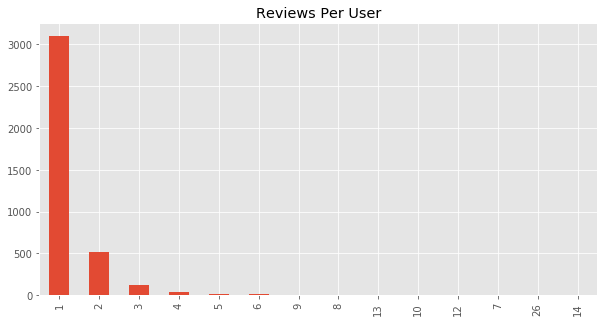

In [218]:
# Visualize reviews per user using Bar chart
reviews_per_user.value_counts().plot(kind='bar', figsize=(10,5), title='Reviews Per User')

(array([ 3.,  0.,  0.,  7.,  0.,  0., 25.,  0.,  0., 81.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Spam Review Ratings')

(array([  63.,    0.,   51.,    0.,    0.,  190.,    0., 1183.,    0.,
        3397.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Non-Spam Review Ratings')

(array([  63.,    0.,   54.,    0.,    0.,  197.,    0., 1208.,    0.,
        3478.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'All Review Ratings')

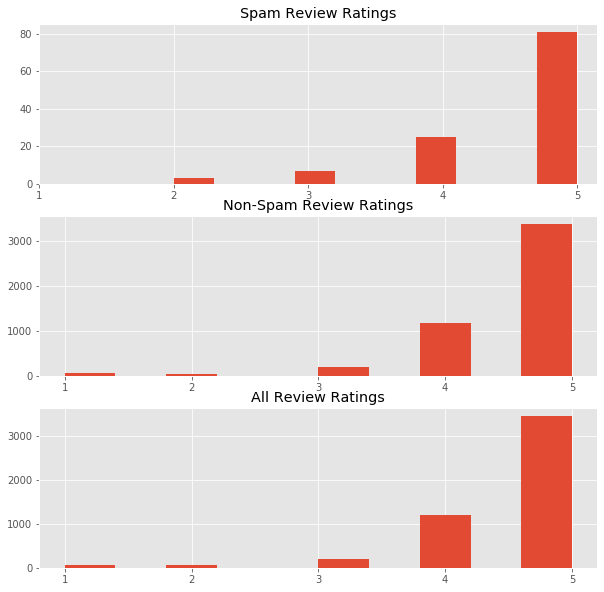

In [8]:
# Visualize reviewers per user distribution, for both bulk and non-bulk reviews

# Add a flag of spam_review to data
data['spam_review'] = data['reviews.username'].apply(lambda x: True if x in spam_reviews.index else False)

# Plot distribution by bulk_review flag
# Good reference of using subplots in matplotlib: https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,10))
ax1.hist(data[data['spam_review']==True]['reviews.rating'])
ax1.set_title('Spam Review Ratings')
ax1.set_xticks([1,2,3,4,5])

ax2.hist(data[data['spam_review']==False]['reviews.rating'])
ax2.set_title('Non-Spam Review Ratings')
ax2.set_xticks([1,2,3,4,5])

ax3.hist(data['reviews.rating'])
ax3.set_xticks([1,2,3,4,5])
ax3.set_title('All Review Ratings')

Quick summary: 


This percentage of spam review (2.3%) and reviewers (0.21%) are low, which means most of the reviews in the dataset are generic.

From the Bar chart, it's clear that more than 3/4 users only submit 1 review.

From the ratings distribution chart, we can confirm that the ratings distributions are reasonable (no visible pattern of particular high or low ratings).

No further clean-up is needed and I will proceed with the analysis.

### Data Analysis

After propoer cleaning and validation of the data set, I'm going to perform analysis and trying to find insights from the data set in order to answer my research questions.

Text(0.5, 1.0, 'Positive Review')

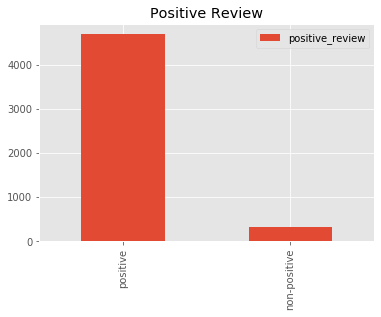

In [9]:
# create a new positive_review column depending whether rating is greater than 4
data['positive_review'] = data['reviews.rating'] >= 4
data['positive_review'] = data['positive_review'].replace([True, False], ['positive', 'non-positive'])
# visualize positive and negative reviews in bar chart
axis = data['positive_review'].value_counts().plot.bar()
axis.legend()
axis.set_title("Positive Review")

General Rating Statistics

In [10]:
data['reviews.rating'].describe()
data['reviews.rating'].value_counts()

count    5000.000000
mean        4.596800
std         0.731804
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: reviews.rating, dtype: float64

5    3478
4    1208
3     197
1      63
2      54
Name: reviews.rating, dtype: int64

Rating | Count | Percentage
---|----|-----
5  |  3478 | 69.56%
4  |  1208 | 24.16%
3  |  197  | 3.94%
2  |  54   | 1.08%
1  |  63   | 1.26%

Count: 5000

Mean: 4.60


- What are the most reviewed Amazon products?
  - *Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen* with 845 reviews, 16.9%

In [11]:
# create a working copy of data with only columns we need
aggregated_data = data[['name', 'reviews.rating']].copy()
# groupby product name and count reviews, adding that as a new attribute to each row
aggregated_data= aggregated_data.groupby('name').agg('count')
aggregated_data.sort_values('reviews.rating', ascending=False)

,reviews.rating
name,
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",845
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",797
Amazon - Echo Plus w/ Built-In Hub - Silver,590
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",561
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",467
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",371
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,225
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",217
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",159


- What are the highly rated Amazon products?
  - *Amazon - Echo Plus w/ Built-In Hub - Silver* is the most highly rated Amazon product

In [12]:
# create a new copy to aggregate data
rating_data = data[['name', 'reviews.rating']].copy()
# groupby product name and count reviews, adding that as a new attribute to each row
rating_data = rating_data.groupby('name').agg(['mean', 'count'])
# Challenge: learned to use tuple in column
# filter on products with more than 50 reviews, sort and find the product with the highest review
rating_data[rating_data[('reviews.rating', 'count')] > 50].sort_values(('reviews.rating', 'mean'), ascending=False ) 

reviews.rating      
                                                             mean count
name                                                                   
Amazon - Echo Plus w/ Built-In Hub - Silver              4.749153   590
Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 G...       4.669811   106
Amazon Echo Show Alexa-enabled Bluetooth Speake...       4.662722   845
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...       4.647059    51
Amazon - Kindle Voyage - 6" - 4GB - Black                4.646341    82
All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi,...       4.598494   797
All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi,...       4.586207    58
Kindle E-reader - White, 6 Glare-Free Touchscre...       4.584906   159
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...       4.577540   561
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...       4.516129   217
Fire Tablet with Alexa, 7" Display, 16 GB, Mage...       4.514851   101
Brand New Amazon Kindle Fire 16gb 7" Ips Displa...       4.509636   467
Fire HD 8 Tablet with Alexa, 8" HD Display, 32 ...       4.509434    53
Amazon Tap - Alexa-Enabled Portable Bluetooth S...       4.506667   225
Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes...       4.460916   371
Amazon Kindle E-Reader 6" Wifi (8th Generation,...       4.406250    96
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...       4.400000    70

### Deep Dive into One Product
#### Categorize ratings

Reference: https://en.wikipedia.org/wiki/Net_Promoter
From Wiki, given review scroe on 0-10 scale, customers who responed score 9-10 are called **Promoters**, 0-6 are labeled as **Detractors**, and 7-8 are labeled as **Passives**.

Definition of each role:
- Promoters: likely to exhibit value-creating behaviors
- Detractors: less likely to exhibit value-creating behaviors
- Passives: falls in between

**Net Promoter Score**

`NetPromotorScore(NPS) = (Promoters - Detractors) / Total ratings * 100`

Refer to Amazon's rating category:
- Rating 5 - Promoters
- Rating 4 - Passives
- Rating 1-3 - Detractors

Pick Amazon Echo Show, the highest rated product

In [13]:
echo_show_data = data[data['name'] == 'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen']

(array([  6.,   0.,   9.,   0.,   0.,  31.,   0., 172.,   0., 627.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Echo Show Review')

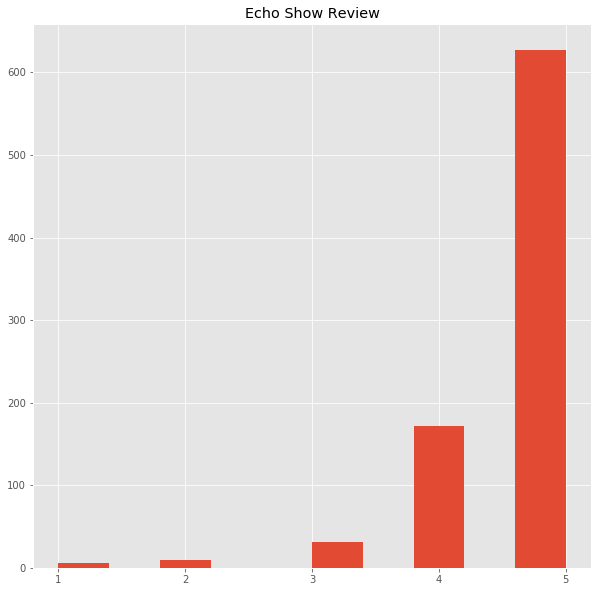

In [14]:
# Visualize review distribution for Echo Show
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(echo_show_data['reviews.rating'])
ax.set_title('Echo Show Review')
ax.set_xticks([1,2,3,4,5])

In [15]:
# Helper method to calculate NPS
def calculate_nps(ratings):
    score = (ratings[5] - sum(ratings[1:3])) / sum(ratings)
    return round(score, 4) * 100

# Calculate Net Promoter Score
echo_show_ratings = echo_show_data['reviews.rating'].value_counts()
echo_show_ratings.sort_index(inplace=True)
nps_echo_show = calculate_nps(echo_show_ratings)
print("Echo Show NPS score: ", nps_echo_show)

Echo Show NPS score:  69.47


In [16]:
# Calculate Net Promoter Score for Echo Show, based on "doRecommend" flag
recommend = echo_show_data[echo_show_data['reviews.doRecommend'] == True]['reviews.rating'].value_counts()
not_recommend = echo_show_data[echo_show_data['reviews.doRecommend'] == False]['reviews.rating'].value_counts()

recommend.sort_index(inplace=True)
not_recommend.sort_index(inplace=True)

print("Recommend ratings:\n{}\nNPS: {}".format(recommend, calculate_nps(recommend)))
print("\nNot recommend ratings:\n{}\nNPS: {}".format(not_recommend, calculate_nps(not_recommend)))

Recommend ratings:
1      1
2      1
3     10
4    171
5    626
Name: reviews.rating, dtype: int64
NPS: 76.02

Not recommend ratings:
1     5
2     8
3    21
4     1
5     1
Name: reviews.rating, dtype: int64
NPS: -77.78


Short summary on findings of Net Promoter Score. Overall, Echo Show has a good NPS score ~70. Separating ratings by whether the customer is recommending this product, it's clear that reviews do recommend has high NPS (76) and not do recommend has negative NPS (-77). This leads to the next step of looking into the relationship between helpful review and rating. 

Text(0.5, 1.0, 'Rating and num of Helpful')

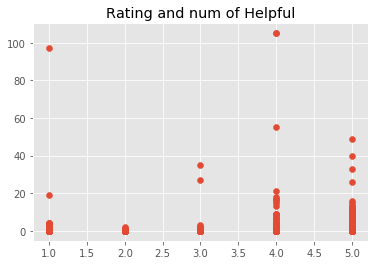

In [22]:
# Correlation with rating and number of helpful
plt.scatter(data['reviews.rating'], data['reviews.numHelpful'])
plt.title("Rating and num of Helpful")
plt.show()

/anaconda3/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


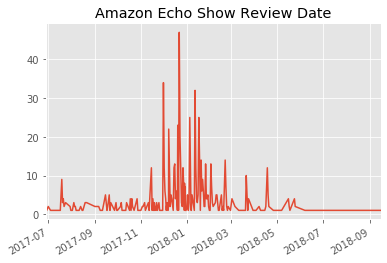

In [19]:
# Pretty format the raw review date
echo_show_data['formatted_date'] = echo_show_data['reviews.date'].apply(lambda x : pd.to_datetime(x))
echo_show_data['formatted_mon'] = echo_show_data['reviews.date'].apply(lambda x : pd.to_datetime(x).month)
review_dates = echo_show_data['formatted_date'].value_counts()
review_dates.plot(title="Amazon Echo Show Review Date")

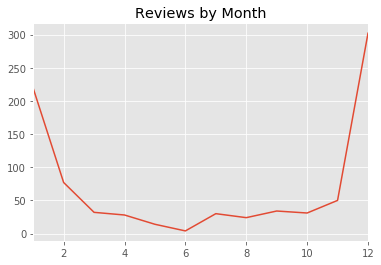

In [23]:
# Format review date to month and plot the distribution
review_months = echo_show_data['formatted_mon'].value_counts()
review_months.sort_index(inplace=True)
review_months.plot(title='Reviews by Month')

It's not surprising that the number of reviews spike from November to January due to holiday shopping.

### WordCloud Visualization
Using wordcloud library to display Top100 words
Reference: https://python-graph-gallery.com/wordcloud/

Before doing that, I need to clean-up the review text by filtering out non-ascii characters and punctuations. This will be achieved by using regular expression. I am going to toggle all words to lower case too. 

The reasoning behind this is that I would like to consolidate as many variations of the a single word (Love/LOVE/lovE to love) to one to avoid duplicates in the word cloud.

#### Review text clean-up
Useful libraries:
- re: Regular expression matching https://docs.python.org/3/library/re.html

In [31]:
# Create a regex object for all valid english chars
format_regex = re.compile('[^a-z]+')
def text_formatter(text):
    # ignore empty spaces, punctuation, and unify cases
    return format_regex.sub(' ', text.lower()).strip()

echo_show_data['reviews.formatted'] = echo_show_data['reviews.text'].apply(text_formatter)
print("Sample formatted text:")
echo_show_data['reviews.formatted'][3]
echo_show_data['reviews.text'][3]

Sample formatted text:


/anaconda3/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


'purchased this device at launch pack for xx and now youtube doesn t work youtube was one of the main features that i used without youtube you ll be better off buying the echo dot instead'

"Purchased this device at launch (2 pack for $384.xx) and now YouTube doesn't work. YouTube was one of the main features that I used. Without YouTube you'll be better off buying the $40 Echo Dot instead."

In [37]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# Helper method to show word cloud given text
def show_wordcloud(data, title):
    wordcloud = WordCloud(width=480, height=480, margin=0, max_font_size=50,
        background_color='grey', stopwords=stopwords, max_words=100).generate(str(data))
    
    fig, axis = plt.subplots(1, figsize=(10, 10))
    axis.set_title(title)
    plt.margins(x=0, y=0)
    plt.axis('off')
    axis.grid(False)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

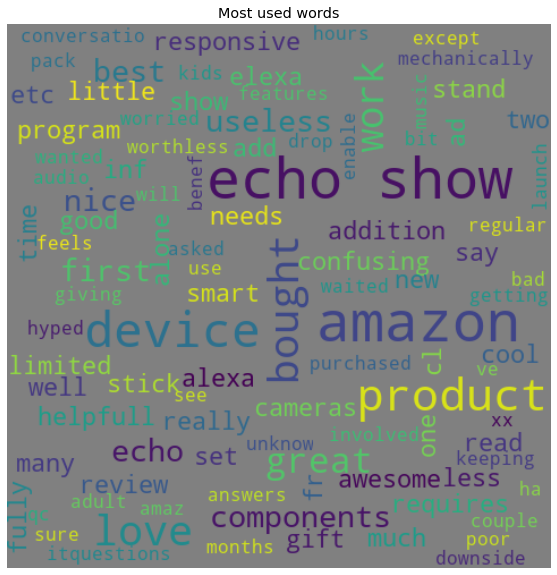

In [38]:
# All words
show_wordcloud(echo_show_data["reviews.formatted"], "Most used words")

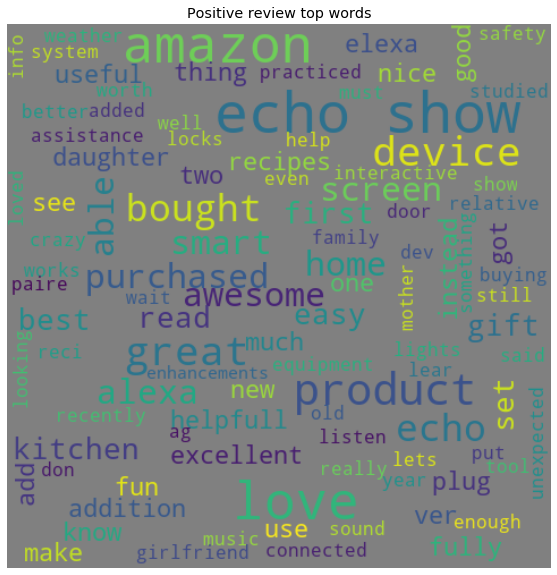

In [42]:
# Positive review top words
show_wordcloud(echo_show_data[echo_show_data['reviews.rating']>=4]['reviews.formatted'], "Positive review top words")

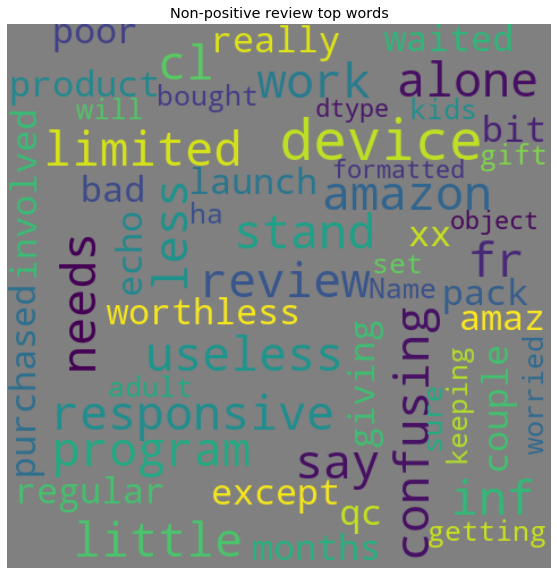

In [41]:
# Non-positive review top words
show_wordcloud(echo_show_data[echo_show_data['reviews.rating'] <= 2]['reviews.formatted'], "Non-positive review top words")

## Findings

**Customers love Amazon Echo Show**

According to the my personal test, customer reviews, and word cloud visualization, customers love the Amazon Echo Show device due to its interactive design, with a smart voice assistant. They think it is a good gift option (especially for girlfriend) and a good fit for many use cases (expecially at Kitchen). 

**Most customers reviews are from November to January**

This is as I expected since it matches the holiday season shopping.

**Amazon produts receive high rating scores**

From the overall rating distribution, I found that 85% of Amazon product received 4+ rating scores. Customers like Amazon product since the early generations. Some of it could be due to the cutting-edge technologies Amazon built in those devices, the accurate targeted buyers, and prevailing marketing efforts Amazon made. To further understand the growing trend of Amazon products, I will need to access to the sales data of those devices, but that's out of scope for this project.

**3-star reviews receive many helpful votes than I expected**

This is clear from the rating distribution. My thought is that 3-star ratings tend to be exhausive and thoughtful. These reviews have a mix of pros and cons which make them different from pure advocating reviews or critics. Customers love to read these reviews to inform them of their purchase decision.


## Conclusion and Reflection

My motivation of this project purely comes from my personal interests of consumer electronics and love of holiday shopping season. My initial plan was to build a holiday shopping list but it evenetually evolved to a study of customer reviews of Amazon product (particularly Amzon Echo Show). I plan to use my findings to inform my future purchase decision. These findings can also help me to write better reviews to potential buyers, and to provide valuable feedback to manufacturers. This may not seem like a strong motivation, but I do think it can help me to explore something I like, to understand the role customer played in shaping a consumer product, and to build up some analytics skills (both quantitative and qualitative).

From this project, I was able to perform analysis on the sampled customer reviews of Amazon prodcut from January 2015 to August 2018. The sampled data set was chosen to reduce the processing time. Given all pieces of code are reproducible, the processing and analysis steps are applicable for any future large datasets.

Other than the findings I listed in [Findings](#Findings), another good lesson I learned is the value of the Net Promoter Score (NPS). Given the reviews are quantified as a score of rating, NPS can be a good metric to evaluate whether customers are satisfied with product. I was able to verify that NPS metric is an accurate representation of whether customer think the Amazon Echo Show is a good product (based on the doRecommend flag). I think this is the metric that we, as shoppers, all need to keep in mind during our online shoppping process in order to transfer an index (product rating score) to something human understandable (whether this is a good product and whether I should buy it). It is a simple metric to calculate based upon the visible review ratings. Customers like us can follow the formula easily to calculate this score and use it as another factor in addition to the review ratings. This is my top takeaway of this quarter where human needs to bridge the gap between machine generated results with the human society.

Future steps of this project will include more detailed sentiment analysis on customer reviews, especially can use Natural Language Processing tools. Should we have those trained models, we can perform predictions on whether the customer will recommend this product to friends, or what review rating will the customer give.


## Reference

- Amazon has sold more than 100 million Alexa devices, https://www.cnet.com/news/amazon-has-sold-more-than-100-million-alexa-devices/
- Net Promoter Score, https://en.wikipedia.org/wiki/Net_Promoter
